In [277]:
!pip install wordcloud

In [278]:
pip install -U textblob


Note: you may need to restart the kernel to use updated packages.


In [279]:
#import the libraries needed 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import os 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from PIL import Image 
from textblob import TextBlob
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## Contents

1. [Clean the Datasets ](#1.-Clean-the-datasets)
    1.1 [Great Britain Dataset](#1.1-Great-Britain-Dataset)
    1.2 [USA Dataset](#1.2-USA-Dataset)
    1.3 [Germany Dataset](#1.3-Germany-Dataset)
    1.4 [Merging](#1.4-Merging)
2. [Data Exploration](#2.-Data-Exploration)
3. [Sentiment Analysis](#3.-Sentiment-Analysis)
    3.1[Wordclouds](#3.1-Wordclouds)
    3.2[Sentiment Analysis](#3.2-Sentiment-Analysis)
4. [Multiple Linear Regression Model](#4.-Multiple-Linear-Regression-Model)
    
    

# 1. Clean the datasets

# 1.1 Great Britain Dataset 

In [280]:
#import relevant datasets. Great Britain, USA, Canada, and Germany. 
df1 = pd.read_csv("GBvideos.csv");
df2 = pd.read_csv("USvideos.csv");
df3 = pd.read_csv("DEvideos.csv");

In [281]:
#check the shape of the dataset
df1.shape 

(38916, 16)

In [282]:
#check the count of rows for each feature
df1.count() 

video_id                  38916
trending_date             38916
title                     38916
channel_title             38916
category_id               38916
publish_time              38916
tags                      38916
views                     38916
likes                     38916
dislikes                  38916
comment_count             38916
thumbnail_link            38916
comments_disabled         38916
ratings_disabled          38916
video_error_or_removed    38916
description               38304
dtype: int64

In [283]:
#check for duplicates of unique video id, which means the same video has been listed twice in the dataset 
df1.video_id.duplicated().sum()

35644

In [284]:
#keep the last dated duplicate to have the most relevance to the current date
df_gb = df1.drop_duplicates(['video_id'], keep='last')

In [285]:
#check that the duplicates have been correctly removed 
df_gb.shape 

(3272, 16)

In [286]:
#check for null values 
df_gb.isna().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               55
dtype: int64

In [287]:
#remove null values as they are missing completely at random and are significantly smaller than the dataset size
df_gb = df_gb.dropna();

In [288]:
df_gb.shape

(3217, 16)

In [289]:
df_gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
22,fiusxyygqGk,17.14.11,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10T15:00:03.000Z,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...
90,sLJdBmAeB_U,17.14.11,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07T19:00:50.000Z,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,False,False,False,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...


# 1.2 USA Dataset 

In [290]:
#check the shape of the dataset
df2.shape 

(40949, 16)

In [291]:
#check the count of rows for each feature
df2.count() 

video_id                  40949
trending_date             40949
title                     40949
channel_title             40949
category_id               40949
publish_time              40949
tags                      40949
views                     40949
likes                     40949
dislikes                  40949
comment_count             40949
thumbnail_link            40949
comments_disabled         40949
ratings_disabled          40949
video_error_or_removed    40949
description               40379
dtype: int64

In [292]:
#check for duplicates of unique video id, which means the same video has been listed twice in the dataset 
df2.video_id.duplicated().sum()

34598

In [293]:
#keep the last dated duplicate to have the most relevance to the current date
df_usa = df2.drop_duplicates(['video_id'], keep='last')

In [294]:
#check that the duplicates have been correctly removed 
df_usa.shape 

(6351, 16)

In [295]:
#check for null values 
df_usa.isna().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               99
dtype: int64

In [296]:
#remove null values as they are missing completely at random and are significantly smaller than the dataset size
df_usa = df_usa.dropna();

In [297]:
df_usa.shape

(6252, 16)

In [298]:
df_usa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,17.14.11,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,2017-11-10T12:04:17.000Z,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


# 1.3 Germany Dataset 

In [299]:
#check the shape of the dataset
df3.shape 

(40840, 16)

In [300]:
#check the count of rows for each feature
df3.count()

video_id                  40840
trending_date             40840
title                     40840
channel_title             40840
category_id               40840
publish_time              40840
tags                      40840
views                     40840
likes                     40840
dislikes                  40840
comment_count             40840
thumbnail_link            40840
comments_disabled         40840
ratings_disabled          40840
video_error_or_removed    40840
description               39288
dtype: int64

In [301]:
#check for duplicates of unique video id, which means the same video has been listed twice in the dataset 
df3.video_id.duplicated().sum()

11213

In [302]:
#keep the last dated duplicate to have the most relevance to the current date
df_germany = df3.drop_duplicates(['video_id'], keep='last')

In [303]:
#check that the duplicates have been correctly removed 
df_germany.shape

(29627, 16)

In [304]:
#check for null values 
df_germany.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1301
dtype: int64

In [305]:
#remove null values as they are missing completely at random and are significantly smaller than the dataset size
df_germany = df_germany.dropna();

In [306]:
#check that the duplicates have been correctly removed 
df_germany.shape 

(28326, 16)

In [307]:
df_germany.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe..."
10,2hu_evXPpMM,17.14.11,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,24,2017-11-12T16:33:18.000Z,"Dagi Bee|""Heiraten""|""Coldmirror""|""YouTube""|""Tr...",228574,11349,990,1049,https://i.ytimg.com/vi/2hu_evXPpMM/default.jpg,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...
12,2Zp-Qm3wJkA,17.14.11,JP Performance - Quetschen wir den Japaner ma...,JP Performance,2,2017-11-13T10:30:01.000Z,"V8|""VMAX""|""Topspeed""|""Prüfstand""|""JP Performan...",465883,19928,216,1240,https://i.ytimg.com/vi/2Zp-Qm3wJkA/default.jpg,False,False,False,Mal schauen was unser Japaner so kann! :D\n- -...
14,3U51cVIqulM,17.14.11,ARAB Lifestyle | mit Bodyformus,PlanetKanax,23,2017-11-13T11:59:43.000Z,"planetkanax|""planet""|""kanax""|""planet kanax""|""a...",99988,6397,298,429,https://i.ytimg.com/vi/3U51cVIqulM/default.jpg,False,False,False,Video mit Bodyformus: https://youtu.be/EIM7RMe...


Add origin column 

In [308]:
df_gb['origin'] = "GB";
df_usa['origin'] = "USA";
df_germany['origin'] = "Germany";

# 1.4 Merge the datasets

In [309]:
df_merge = pd.concat([df_gb , df_usa, df_germany])
df_merge.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,origin
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
22,fiusxyygqGk,17.14.11,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10T15:00:03.000Z,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
90,sLJdBmAeB_U,17.14.11,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07T19:00:50.000Z,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,False,False,False,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB


In [310]:
df_merge.shape

(37795, 17)

# 2 Data Exploration 

Construct visuals to get global understanding of data distribution 

In [311]:
gb = df_merge.loc[df_merge['origin'] == 'GB'].count()[0];
gb


3217

In [312]:
usa = df_merge.loc[df_merge['origin'] == 'USA'].count()[0];
usa

6252

In [313]:
germany = df_merge.loc[df_merge['origin'] == 'Germany'].count()[0];
germany

28326

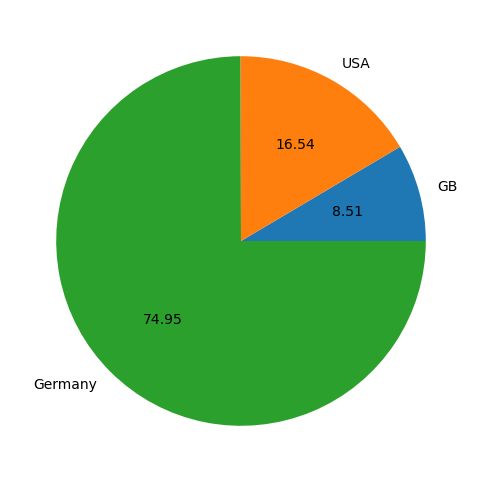

In [314]:
#create a pie chart of the origin distribution 
#figure 1
labels = ['GB','USA','Germany']

plt.pie([gb,usa,germany], labels = labels, autopct='%.2f')
plt.show()

Isolate the views count for each country 

In [315]:
gb_views = df_merge.loc[df_merge.origin == 'GB']['views']
gb_views

4            9815
5         1182775
7         1164201
22        3407008
90          87772
           ...   
38911    25066952
38912     1492219
38913    29641412
38914    14317515
38915      607552
Name: views, Length: 3217, dtype: int64

In [316]:
usa_views = df_merge.loc[df_merge.origin == 'USA']['views']
usa_views 

10          81377
36         288922
41          34785
55        1496225
76         237307
           ...   
40943     8259128
40944     1685609
40946     1066451
40947     5660813
40948    10306119
Name: views, Length: 6252, dtype: int64

In [317]:
germany_views = df_merge.loc[df_merge.origin == 'Germany']['views']
germany_views

6         308683
9          62418
10        228574
12        465883
14         99988
          ...   
40835    1394530
40836     139733
40837      26054
40838    1139198
40839     316328
Name: views, Length: 28326, dtype: int64

Build a box and whiskers plot to compare the views count in all three countries 

[]

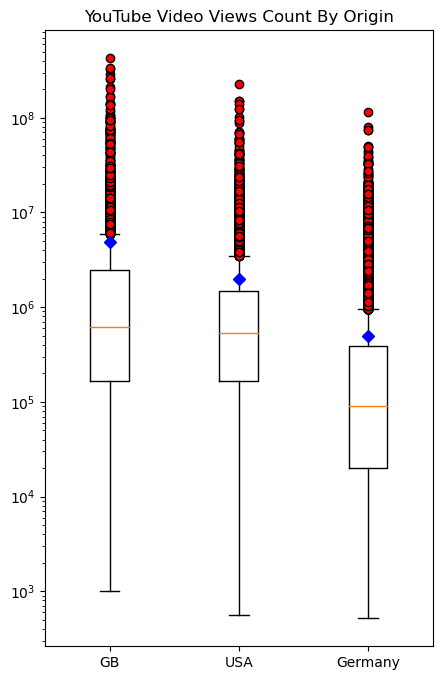

In [318]:
plt.style.use('default')
plt.figure(figsize=(5,8))

labels = ['GB', 'USA', 'Germany']
red_circle= dict(markerfacecolor='red',marker='o')
mean = dict(markerfacecolor='blue', marker='D', markeredgecolor='blue')

plt.boxplot([gb_views, usa_views, germany_views], labels=labels, flierprops=red_circle, showmeans=True, meanprops=mean);
plt.title('YouTube Video Views Count By Origin')
plt.semilogy()

Germany has a slightly lower view count average, that could however be due to the much larger dataset. 

Explore the correlations between the features

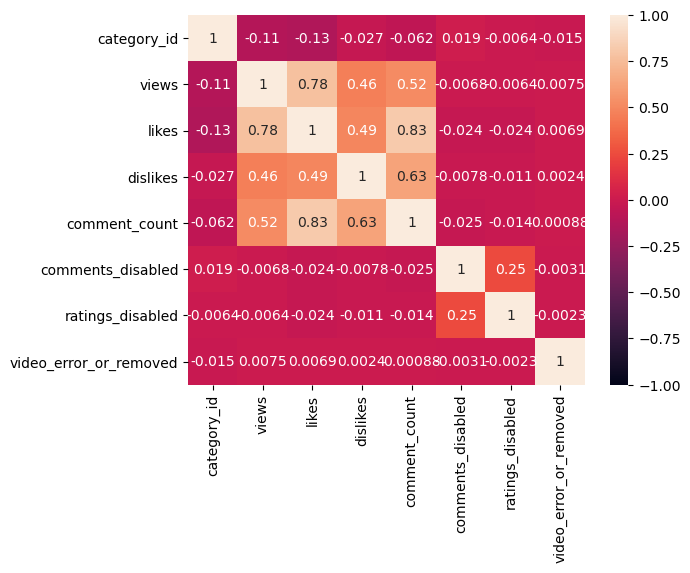

In [319]:
heatmap = sns.heatmap(df_merge.corr(), vmin=-1, vmax=1, annot=True)

Columns 'comments_disabled', 'ratings_disabled' do not have any influence on the dataset. Column 'video_error_or_removed' has an unsignificant influence on the dataset. All three columns will be dropped from the dataset. 

The three most signicant correlations are:

- Views and likes have a high correlation of 0.78.
- Comment count and likes have a high correlation of 0.83.
- Comment count and dislikes have a high correlation of 0.63.

In [320]:
df_merge_clean = df_merge.drop(['comments_disabled','ratings_disabled','video_error_or_removed'], axis = 1)
df_merge_clean.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,origin
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,GB
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
22,fiusxyygqGk,17.14.11,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10T15:00:03.000Z,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
90,sLJdBmAeB_U,17.14.11,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07T19:00:50.000Z,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB


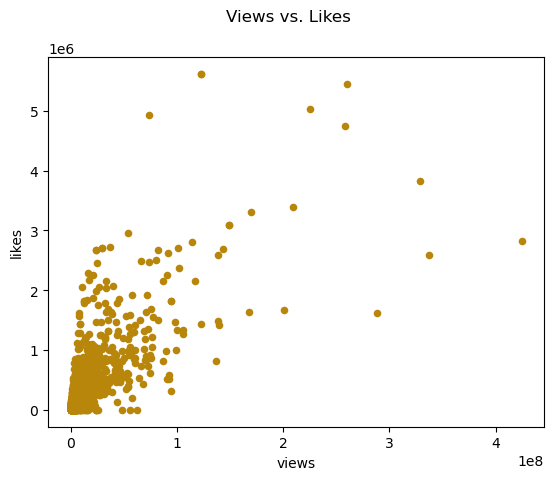

In [321]:
#explore the correlations further using scatterplots 
#using the code structure from the 3rd lab in pods 
plt.xlabel('views')
plt.suptitle('Views vs. Likes')
plt.ylabel('likes')
plt.scatter(df_merge_clean.views, df_merge.likes , color='darkgoldenrod' , s = 30, linewidth= 0)

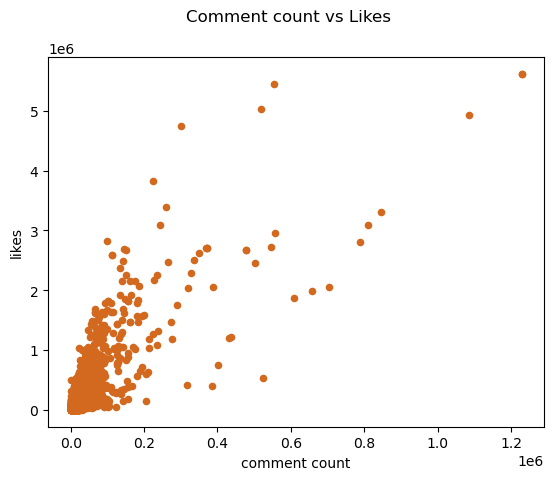

In [322]:
plt.xlabel('comment count')
plt.suptitle('Comment count vs Likes')
plt.ylabel('likes')
plt.scatter(df_merge_clean.comment_count, df_merge.likes , color='chocolate' , s = 30, linewidth= 0)

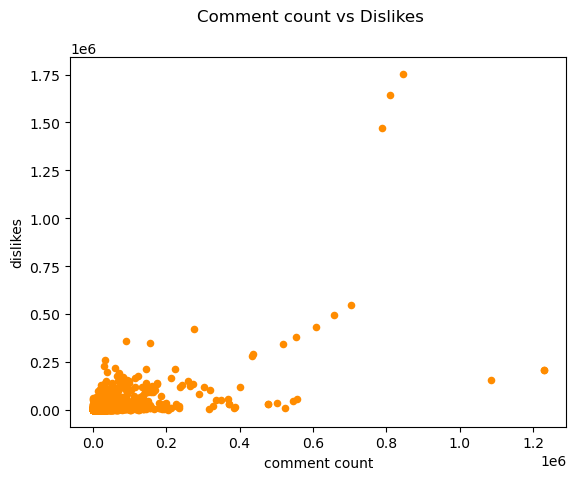

In [323]:
plt.xlabel('comment count')
plt.suptitle('Comment count vs Dislikes')
plt.ylabel('dislikes')
plt.scatter(df_merge_clean.comment_count, df_merge.dislikes , color='darkorange' , s = 30, linewidth= 0)

Relationship between views, likes, and comment count

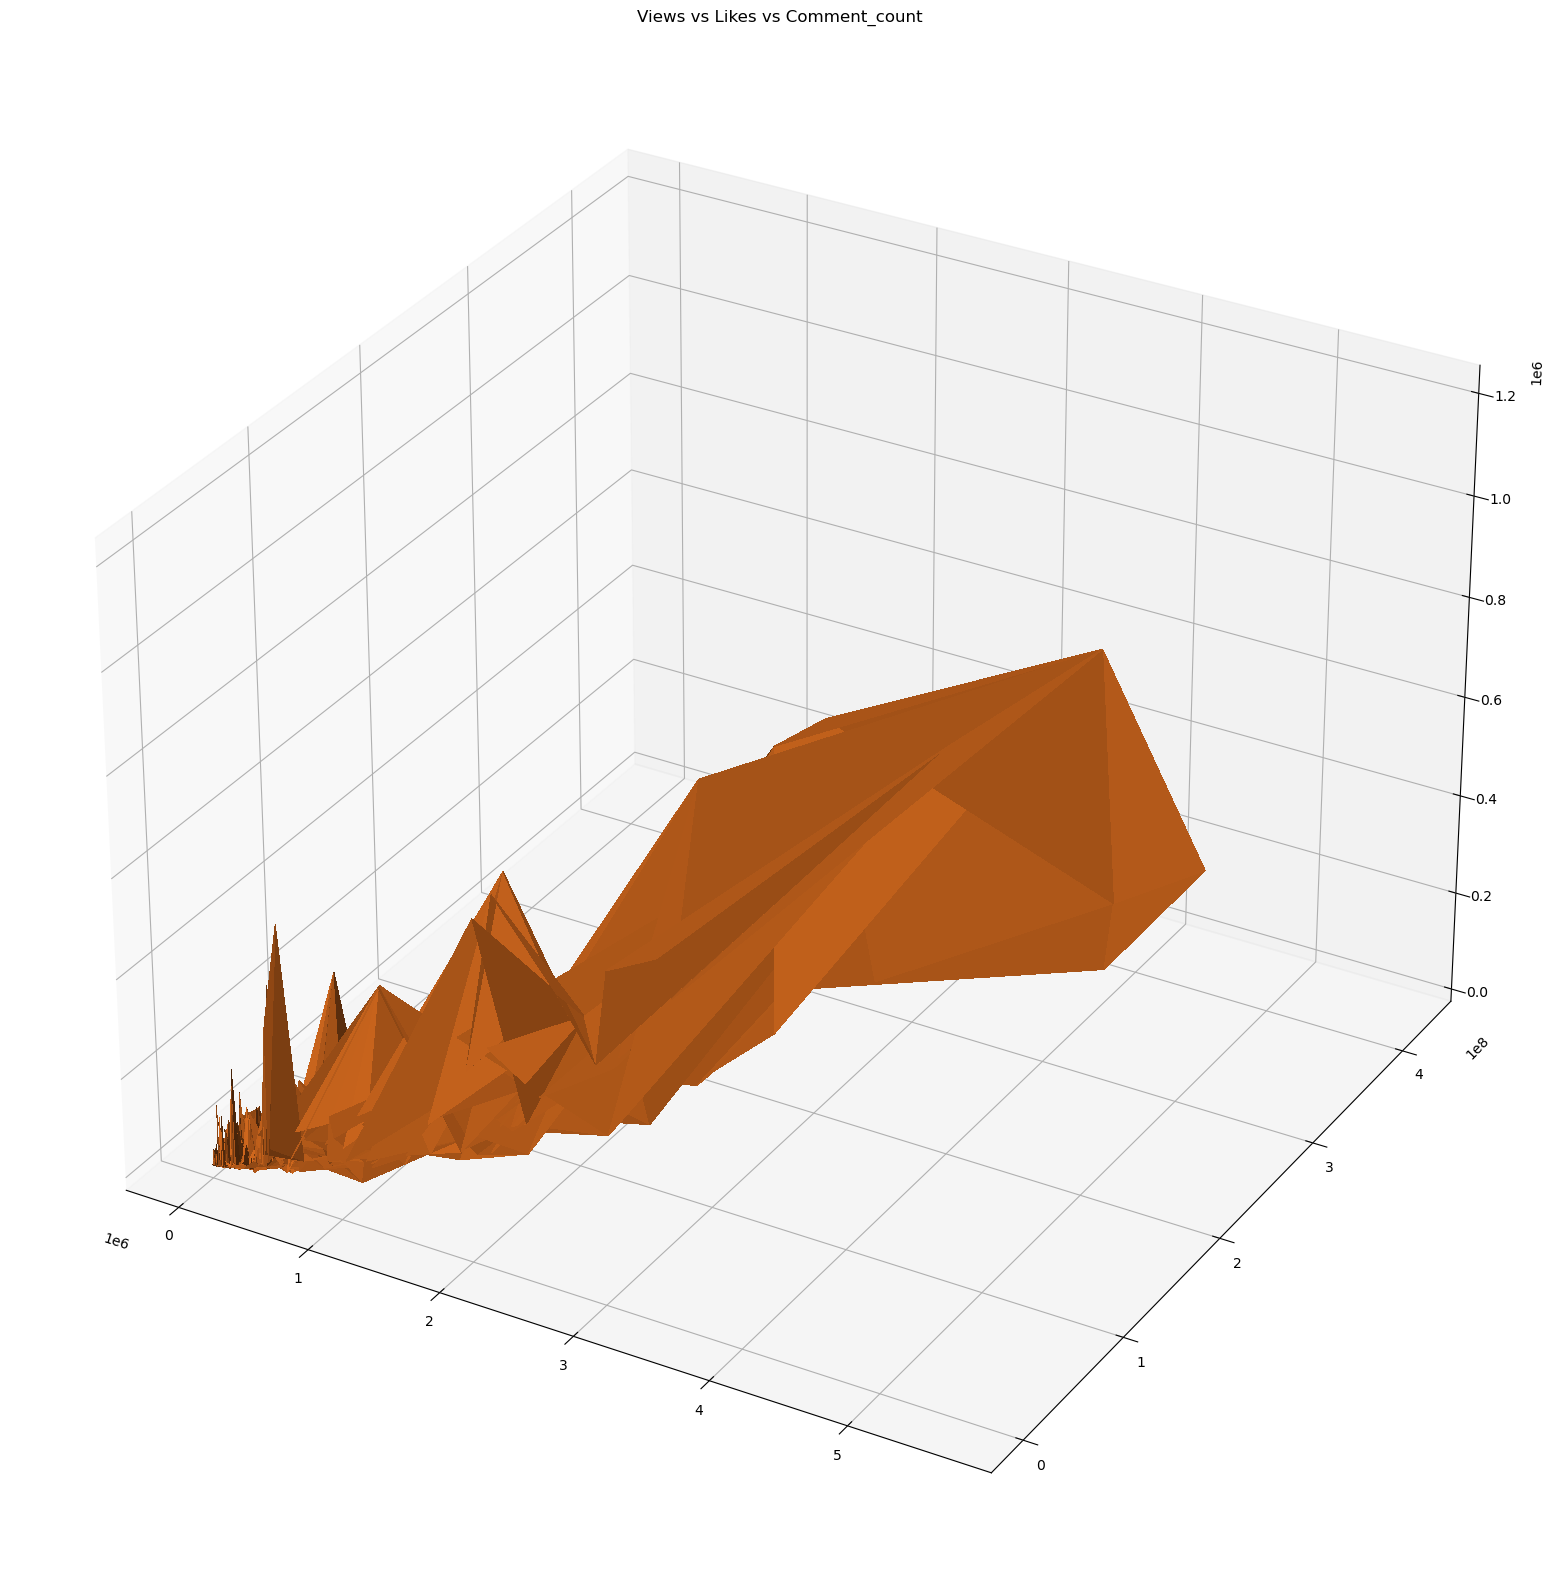

In [324]:
#code inspired from https://www.kaggle.com/harish1306/imdb-data-analysis
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection ='3d')

z = df_merge_clean["comment_count"]
x = df_merge_clean["likes"]
y = df_merge_clean["views"]
fig.set_figwidth(40)
fig.set_figheight(20)

ax.plot_trisurf(x,y,z ,linewidth=0, antialiased=False, color='chocolate')
ax.set_title('Views vs Likes vs Comment_count')
ax.legend
plt.show()

Numerical Features 

General descriptive statistics 

In [325]:
numeric = df_merge_clean.select_dtypes(include ='number')

In [326]:
stats = numeric.describe()
stats

,category_id,views,likes,dislikes,comment_count
count,37795.000000,3.779500e+04,3.779500e+04,3.779500e+04,3.779500e+04
mean,20.627543,1.108130e+06,2.989491e+04,1.708731e+03,3.439924e+03
std,7.039084,6.684427e+06,1.416743e+05,1.760135e+04,2.055671e+04
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,3.062150e+04,5.810000e+02,3.100000e+01,8.800000e+01
50%,24.000000,1.564940e+05,3.119000e+03,1.540000e+02,4.360000e+02
75%,24.000000,6.112345e+05,1.497000e+04,6.300000e+02,1.690000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.753274e+06,1.228655e+06


Non-numerical features 

In [327]:
df_merge_clean.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,origin
count,37795,37795,37795,37795,37795,37795,37795,37795,37795
unique,35482,205,35415,8001,33593,29564,35476,32437,3
top,ffxKSjUwKdU,18.14.06,Ուղիղ միացում Երևանից | LIVE from Yerevan | Пр...,The Late Show with Stephen Colbert,2018-04-26T15:00:03.000Z,[none],https://i.ytimg.com/vi/VwAnsAUYnw4/default.jpg,Новости БЕЗ нашего мнения - http://sharij.net/...,Germany
freq,3,555,10,200,7,1975,3,115,28326


In [328]:
#Discover which channels are the most popular in all three countries 
df_merge_clean['channel_title'].value_counts()

The Late Show with Stephen Colbert        200
The Tonight Show Starring Jimmy Fallon    182
TheEllenShow                              171
Jimmy Kimmel Live                         166
Анатолий Шарий                            166
                                         ... 
Jacko Wusch                                 1
Pick Up Limes                               1
Footballers World                           1
JENNYMOMENT                                 1
SlideShow ForFun                            1
Name: channel_title, Length: 8001, dtype: int64

Exploring the correlations betwen date published, trending date, and views

In [329]:
#change the format of the publish time column and treding data column 
#date codes https://www.w3schools.com/python/gloss_python_date_format_codes.asp
df_merge_clean['trending_date'] = pd.to_datetime(df_merge_clean['trending_date'], format ='%y.%d.%m')

In [330]:
#check that the formatting for trending date has been correctly adjusted
df_merge_clean['trending_date'].head()

4    2017-11-14
5    2017-11-14
7    2017-11-14
22   2017-11-14
90   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [331]:
df_merge_clean['publish_time'] = pd.to_datetime(df_merge_clean['publish_time'], format ='%Y-%m-%dT%H:%M:%S.%fZ')

In [332]:
#check that the formatting for publish time has been correctly adjusted
df_merge_clean['publish_time'].head()

4    2017-11-13 01:45:13
5    2017-11-11 17:00:00
7    2017-11-10 19:19:43
22   2017-11-10 15:00:03
90   2017-11-07 19:00:50
Name: publish_time, dtype: datetime64[ns]

In [333]:
df_merge_clean.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,origin
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,GB
5,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11 17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
7,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10 19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
22,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10 15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
90,sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07 19:00:50,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB


In [334]:
#create a column of the weekdays the video have been posted 
df_days = df_merge_clean['publish_time'].dt.day_name()
df_days

4           Monday
5         Saturday
7           Friday
22          Friday
90         Tuesday
           ...    
40835      Tuesday
40836    Wednesday
40837      Tuesday
40838       Monday
40839    Wednesday
Name: publish_time, Length: 37795, dtype: object

In [335]:
#add the new column to the dataset 
df_merge_clean['publish day'] = df_days

In [336]:
df_time = df_merge_clean['publish_time'].dt.time

In [337]:
df_merge_clean['publish time'] = df_time

<ipython-input-338-4822090e1dd6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  barchart.set_yticklabels(['{:,}'.format(int(x)) for x in barchart.get_yticks().tolist()])


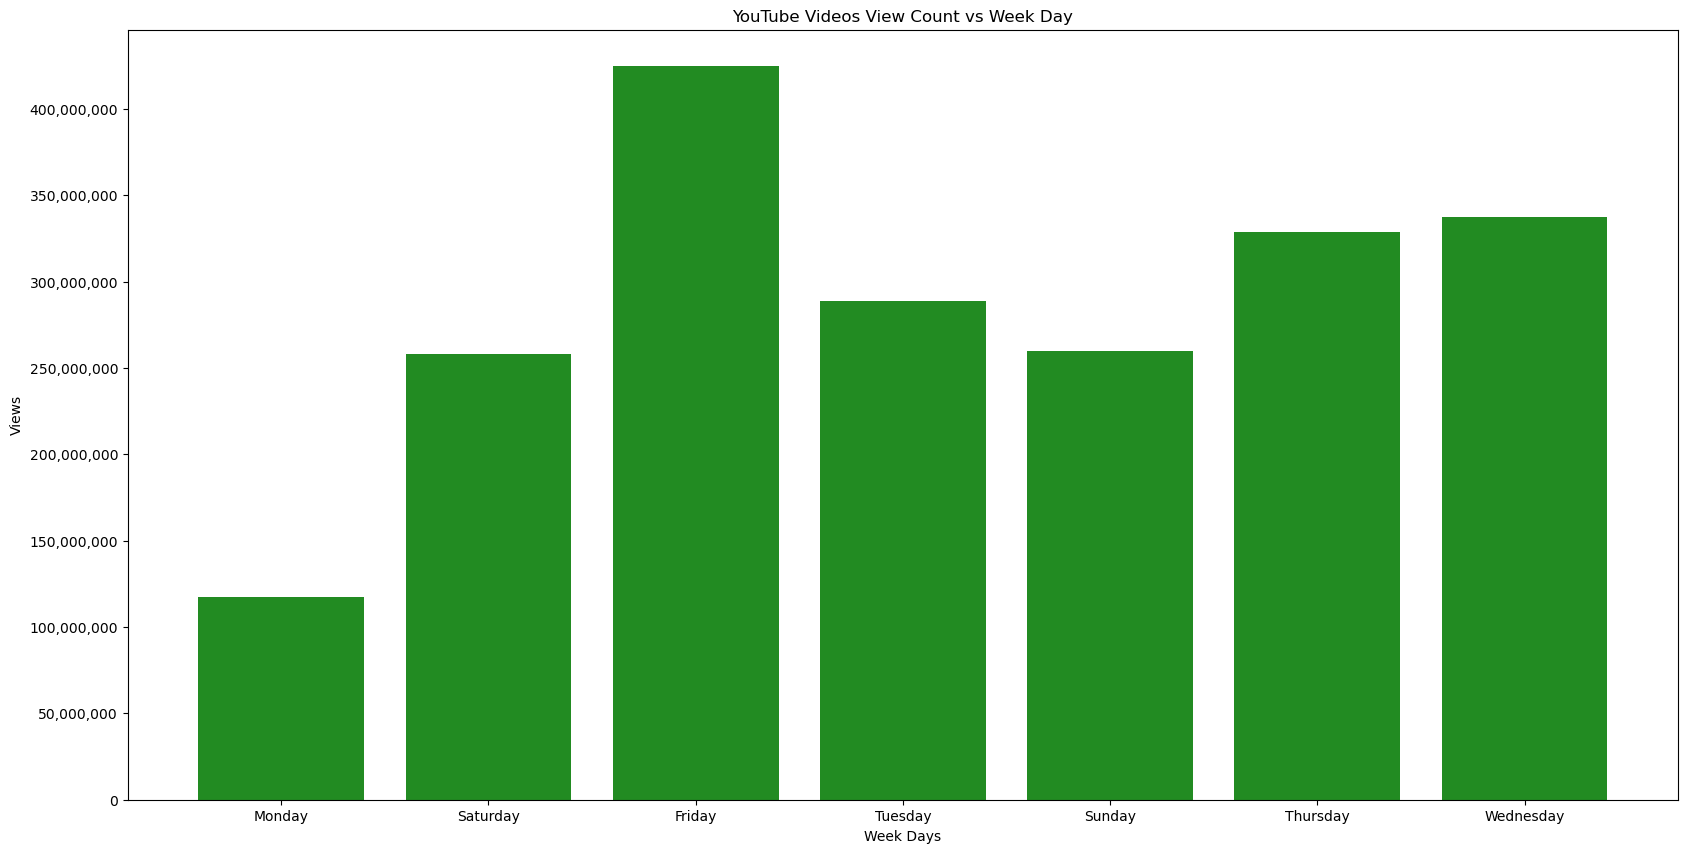

In [338]:
#https://www.youtube.com/watch?v=UdcvMLtOrbE
fig, barchart = plt.subplots(figsize=(20,10))

barchart.bar(df_merge_clean['publish day'], df_merge_clean['views'], color='forestgreen')
barchart.set_yticklabels(['{:,}'.format(int(x)) for x in barchart.get_yticks().tolist()])

#ax2 = ax1.twinx()
#ax2.plot(df_merge_clean['publish day'], df_merge_clean['publish time'])

barchart.set_title('YouTube Videos View Count vs Week Day')
barchart.set_xlabel('Week Days')
barchart.set_ylabel('Views')
plt.show()

# 3. Sentiment Analysis that parses YouTube titles and comments 

# 3.1 Wordclouds

In [339]:
#Word cloud of the titles in the Great Britain to find the most used vocabulary
titles_gb = df_merge_clean.loc[df_merge_clean.origin == 'GB']['title']

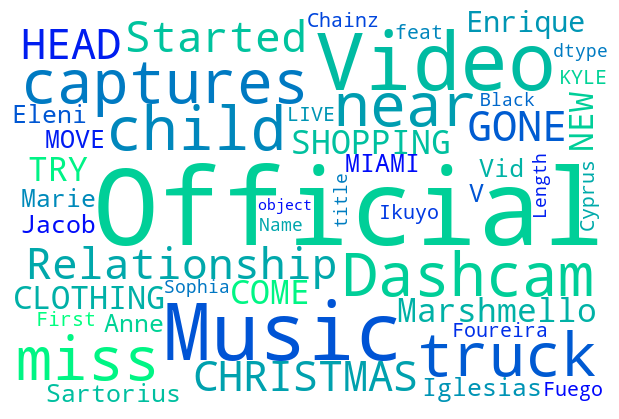

In [340]:
#code inspired from PODS lab 8
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white', colormap=matplotlib.cm.winter,
                min_font_size = 10).generate(str(titles_gb)) 

plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [341]:
#Word cloud of the titles in the USA to find the most used vocabulary
titles_usa = df_merge_clean.loc[df_merge_clean.origin == 'USA']['title']


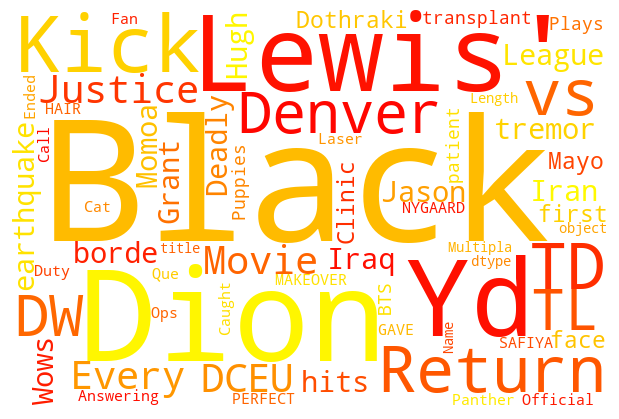

In [342]:
#code inspired from PODS lab 8
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white', colormap=matplotlib.cm.autumn,
                min_font_size = 10).generate(str(titles_usa)) 

plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [343]:
#Word cloud of the titles in Germany to find the most used vocabulary
titles_germany = df_merge_clean.loc[df_merge_clean.origin == 'Germany']['title']

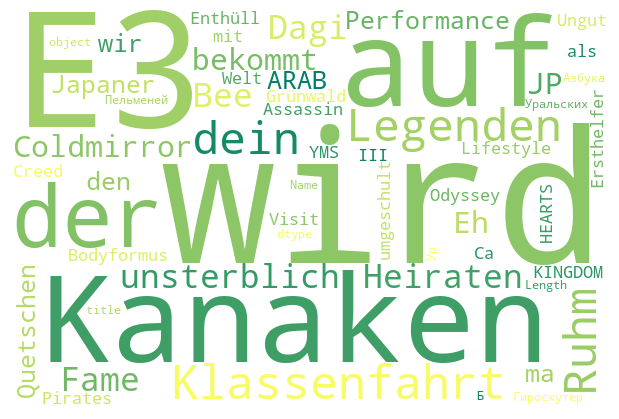

In [344]:
#code inspired from PODS lab 8
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white', colormap=matplotlib.cm.summer,
                min_font_size = 10).generate(str(titles_germany)) 

plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# 3.2 Sentiment Analysis

The sentiment analysis will only be performed on the description datasets from GB and USA, due to the language barrier present in many of the Germany description dataset. 

In [345]:
#remove unwanted characters from descriptions for GB
#code inspired from https://www.youtube.com/watch?v=ujId4ipkBio
def cleanTxt(text): 
    text = re.sub(r'▶', '', text)
    text = re.sub(r'►', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'!', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'•', '', text)
    text = re.sub(r'\n', '', text)
    
    return text 

df_merge_clean['description'] = df_merge_clean['description'].apply(cleanTxt)

In [346]:
#check that the descriptions have been cleaned 
df_merge_clean.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,origin,publish day,publish time
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,GB,Monday,01:45:13
5,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11 17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,HOW MY RELATIONSHIP STARTED\n PB Merch \n P...,GB,Saturday,17:00:00
7,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10 19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB,Friday,19:19:43
22,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10 15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,PURCHASE YOU & ME HERE WOLVES VERTICAL VIDEO...,GB,Friday,15:00:03
90,sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07 19:00:50,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB,Tuesday,19:00:50


In [347]:
#Create columns for to store subjuctivity and polarity values 
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def polarity(text):
    return TextBlob(text).sentiment.polarity 

df_merge_clean['subjectivity'] = df_merge_clean['description'].apply(subjectivity)
df_merge_clean['polarity'] = df_merge_clean['description'].apply(polarity)



In [348]:
df_merge_clean.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,origin,publish day,publish time,subjectivity,polarity
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,GB,Monday,01:45:13,0.400000,0.100000
5,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11 17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,HOW MY RELATIONSHIP STARTED\n PB Merch \n P...,GB,Saturday,17:00:00,0.000000,0.000000
7,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10 19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB,Friday,19:19:43,0.437500,-0.037500
22,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10 15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,PURCHASE YOU & ME HERE WOLVES VERTICAL VIDEO...,GB,Friday,15:00:03,0.000000,0.000000
90,sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07 19:00:50,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB,Tuesday,19:00:50,0.586797,0.216545


In [349]:
descriptions = df_merge_clean['description']

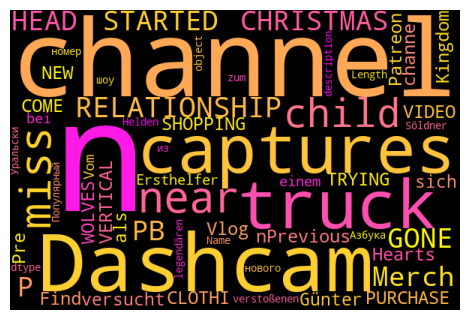

In [350]:
#wordcloud of the most used words in the descriptions 
#code inspired from PODS lab 8
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='black', colormap=matplotlib.cm.spring,
                min_font_size = 10).generate(str(descriptions)) 

plt.figure(figsize = (6, 3), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [351]:
#Assign a neutral, positive, and negative tag to the sentiment score (based on subjectivity and polarity)

def score(s):
    if s > 0:
        return 'Positive'
    if s == 0: 
        return 'Neutral'
    if s < 0:
        return 'Negative'

df_merge_clean['Score'] = df_merge_clean['polarity'].apply(score)

In [352]:
df_merge_clean

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,origin,publish day,publish time,subjectivity,polarity,Score
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,GB,Monday,01:45:13,0.400000,0.100000,Positive
5,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11 17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,HOW MY RELATIONSHIP STARTED\n PB Merch \n P...,GB,Saturday,17:00:00,0.000000,0.000000,Neutral
7,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10 19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB,Friday,19:19:43,0.437500,-0.037500,Negative
22,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10 15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,PURCHASE YOU & ME HERE WOLVES VERTICAL VIDEO...,GB,Friday,15:00:03,0.000000,0.000000,Neutral
90,sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07 19:00:50,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB,Tuesday,19:00:50,0.586797,0.216545,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,2018-06-14,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12 01:54:02,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: and Pre...,Germany,Tuesday,01:54:02,0.666442,0.319192,Positive
40836,zAFv43lxqHE,2018-06-14,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13 21:58:43,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: channel: channel: channe...,Germany,Wednesday,21:58:43,0.066667,0.000000,Neutral
40837,zSXG5I6Y2fA,2018-06-14,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12 10:01:28,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...,Germany,Tuesday,10:01:28,0.000000,0.000000,Neutral
40838,5d115sePmaU,2018-06-14,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11 21:16:55,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,...",Germany,Monday,21:16:55,0.000000,0.000000,Neutral


In [353]:
#Percentage of positive descriptions 
positive_descriptions = df_merge_clean[df_merge_clean.Score == 'Positive']
positive_descriptions = positive_descriptions['description']
round ((positive_descriptions.shape[0] / df_merge_clean.shape[0]) *100, 1)


47.8

In [354]:
#Percentage of negative descriptions 
negative_descriptions = df_merge_clean[df_merge_clean.Score == 'Negative']
negative_descriptions = negative_descriptions['description']
round ((negative_descriptions.shape[0] / df_merge_clean.shape[0]) *100, 1)

8.3

In [355]:
#Percentage of neutral descriptions 
neutral_descriptions = df_merge_clean[df_merge_clean.Score == 'Neutral']
neutral_descriptions = neutral_descriptions['description']
round ((neutral_descriptions.shape[0] / df_merge_clean.shape[0]) *100, 1)

44.0

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

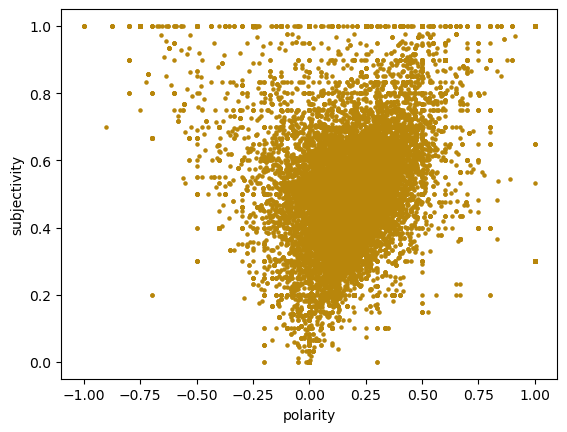

In [356]:
df_merge_clean.plot.scatter(x='polarity', y='subjectivity', s=5, color='darkgoldenrod')


# 4. Multiple Linear Regression Model 

In [357]:
#create a dataframe with the features for the the multiple linear regression model 
df_mlr = df_merge_clean[['views','likes', 'dislikes', 'comment_count', 'origin', 'publish day', 'Score']].copy()


In [358]:
df_mlr.head()

,views,likes,dislikes,comment_count,origin,publish day,Score
4,9815,30,2,30,GB,Monday,Positive
5,1182775,52708,1431,2333,GB,Saturday,Neutral
7,1164201,57309,749,624,GB,Friday,Negative
22,3407008,207262,3167,13279,GB,Friday,Neutral
90,87772,2617,86,192,GB,Tuesday,Positive


In [359]:
#creating dummy variables 
#Score is ordinal 
dummies = pd.get_dummies(df_mlr.Score)
dummies

,Negative,Neutral,Positive
4,0,0,1
5,0,1,0
7,1,0,0
22,0,1,0
90,0,0,1
...,...,...,...
40835,0,0,1
40836,0,1,0
40837,0,1,0
40838,0,1,0


In [360]:
#add the dummy variables to the dataset 
df_mlr1 = pd.concat([df_mlr, dummies], axis='columns')
df_mlr1

,views,likes,dislikes,comment_count,origin,publish day,Score,Negative,Neutral,Positive
4,9815,30,2,30,GB,Monday,Positive,0,0,1
5,1182775,52708,1431,2333,GB,Saturday,Neutral,0,1,0
7,1164201,57309,749,624,GB,Friday,Negative,1,0,0
22,3407008,207262,3167,13279,GB,Friday,Neutral,0,1,0
90,87772,2617,86,192,GB,Tuesday,Positive,0,0,1
...,...,...,...,...,...,...,...,...,...,...
40835,1394530,46778,501,9878,Germany,Tuesday,Positive,0,0,1
40836,139733,11155,119,1968,Germany,Wednesday,Neutral,0,1,0
40837,26054,364,11,8,Germany,Tuesday,Neutral,0,1,0
40838,1139198,14900,1421,1587,Germany,Monday,Neutral,0,1,0


In [361]:
#remove score and neutral columns to reduce redundancy
df_mlr2 = df_mlr1.drop(['Score', 'Neutral'], axis='columns')
df_mlr2

,views,likes,dislikes,comment_count,origin,publish day,Negative,Positive
4,9815,30,2,30,GB,Monday,0,1
5,1182775,52708,1431,2333,GB,Saturday,0,0
7,1164201,57309,749,624,GB,Friday,1,0
22,3407008,207262,3167,13279,GB,Friday,0,0
90,87772,2617,86,192,GB,Tuesday,0,1
...,...,...,...,...,...,...,...,...
40835,1394530,46778,501,9878,Germany,Tuesday,0,1
40836,139733,11155,119,1968,Germany,Wednesday,0,0
40837,26054,364,11,8,Germany,Tuesday,0,0
40838,1139198,14900,1421,1587,Germany,Monday,0,0


In [362]:
#origin is nominal 
dummies1 = pd.get_dummies(df_mlr2.origin)
dummies1

,GB,Germany,USA
4,1,0,0
5,1,0,0
7,1,0,0
22,1,0,0
90,1,0,0
...,...,...,...
40835,0,1,0
40836,0,1,0
40837,0,1,0
40838,0,1,0


In [363]:
#add the dummy variables to the dataset 
df_mlr3 = pd.concat([df_mlr2, dummies1], axis='columns')
df_mlr3

,views,likes,dislikes,comment_count,origin,publish day,Negative,Positive,GB,Germany,USA
4,9815,30,2,30,GB,Monday,0,1,1,0,0
5,1182775,52708,1431,2333,GB,Saturday,0,0,1,0,0
7,1164201,57309,749,624,GB,Friday,1,0,1,0,0
22,3407008,207262,3167,13279,GB,Friday,0,0,1,0,0
90,87772,2617,86,192,GB,Tuesday,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
40835,1394530,46778,501,9878,Germany,Tuesday,0,1,0,1,0
40836,139733,11155,119,1968,Germany,Wednesday,0,0,0,1,0
40837,26054,364,11,8,Germany,Tuesday,0,0,0,1,0
40838,1139198,14900,1421,1587,Germany,Monday,0,0,0,1,0


In [364]:
#remove origin and germany columns to reduce redundancy
df_mlr4 = df_mlr3.drop(['origin', 'Germany'], axis='columns')
df_mlr4

,views,likes,dislikes,comment_count,publish day,Negative,Positive,GB,USA
4,9815,30,2,30,Monday,0,1,1,0
5,1182775,52708,1431,2333,Saturday,0,0,1,0
7,1164201,57309,749,624,Friday,1,0,1,0
22,3407008,207262,3167,13279,Friday,0,0,1,0
90,87772,2617,86,192,Tuesday,0,1,1,0
...,...,...,...,...,...,...,...,...,...
40835,1394530,46778,501,9878,Tuesday,0,1,0,0
40836,139733,11155,119,1968,Wednesday,0,0,0,0
40837,26054,364,11,8,Tuesday,0,0,0,0
40838,1139198,14900,1421,1587,Monday,0,0,0,0


In [365]:
#publish day is nominal 
dummies2 = pd.get_dummies(df_mlr4['publish day'])
dummies2

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
4,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0
7,1,0,0,0,0,0,0
22,1,0,0,0,0,0,0
90,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
40835,0,0,0,0,0,1,0
40836,0,0,0,0,0,0,1
40837,0,0,0,0,0,1,0
40838,0,1,0,0,0,0,0


In [366]:
#add the dummy variables to the dataset 
df_mlr5 = pd.concat([df_mlr4, dummies2], axis='columns')
df_mlr5

,views,likes,dislikes,comment_count,publish day,Negative,Positive,GB,USA,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
4,9815,30,2,30,Monday,0,1,1,0,0,1,0,0,0,0,0
5,1182775,52708,1431,2333,Saturday,0,0,1,0,0,0,1,0,0,0,0
7,1164201,57309,749,624,Friday,1,0,1,0,1,0,0,0,0,0,0
22,3407008,207262,3167,13279,Friday,0,0,1,0,1,0,0,0,0,0,0
90,87772,2617,86,192,Tuesday,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,1394530,46778,501,9878,Tuesday,0,1,0,0,0,0,0,0,0,1,0
40836,139733,11155,119,1968,Wednesday,0,0,0,0,0,0,0,0,0,0,1
40837,26054,364,11,8,Tuesday,0,0,0,0,0,0,0,0,0,1,0
40838,1139198,14900,1421,1587,Monday,0,0,0,0,0,1,0,0,0,0,0


In [367]:
#remove origin and germany columns to reduce redundancy
df_mlr6 = df_mlr5.drop(['publish day', 'Monday'], axis='columns')
df_mlr6


,views,likes,dislikes,comment_count,Negative,Positive,GB,USA,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
4,9815,30,2,30,0,1,1,0,0,0,0,0,0,0
5,1182775,52708,1431,2333,0,0,1,0,0,1,0,0,0,0
7,1164201,57309,749,624,1,0,1,0,1,0,0,0,0,0
22,3407008,207262,3167,13279,0,0,1,0,1,0,0,0,0,0
90,87772,2617,86,192,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,1394530,46778,501,9878,0,1,0,0,0,0,0,0,1,0
40836,139733,11155,119,1968,0,0,0,0,0,0,0,0,0,1
40837,26054,364,11,8,0,0,0,0,0,0,0,0,1,0
40838,1139198,14900,1421,1587,0,0,0,0,0,0,0,0,0,0


Assign the x and y variables that will be used for the regression

In [368]:
x = df_mlr6.drop(['views'], axis=1).values
y = df_mlr6['views'].values

In [369]:
x

array([[   30,     2,    30, ...,     0,     0,     0],
       [52708,  1431,  2333, ...,     0,     0,     0],
       [57309,   749,   624, ...,     0,     0,     0],
       ...,
       [  364,    11,     8, ...,     0,     1,     0],
       [14900,  1421,  1587, ...,     0,     0,     0],
       [11394,   352,   550, ...,     0,     0,     1]])

In [370]:
y

array([   9815, 1182775, 1164201, ...,   26054, 1139198,  316328])

Split the dataset into training and testing sets 

In [371]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Train the regression using the train set without feature selection 

In [372]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

Test the regression using the test set

In [373]:
predicted = linear.predict(x_test)

In [374]:
predicted

array([4309498.70253227,   59905.97435834, 1569796.4213882 , ...,
        112504.46099231,  106030.81230084,   48801.61950756])

Evaluate the model using the coefficient of determination r2 

In [375]:
r2_score(y_test,predicted)

0.747725926988791

Our r2 score revealed that our model is about 75% accurate

<ipython-input-376-5ed0af1b53a7>:4: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('symlog',linthreshx=5.)


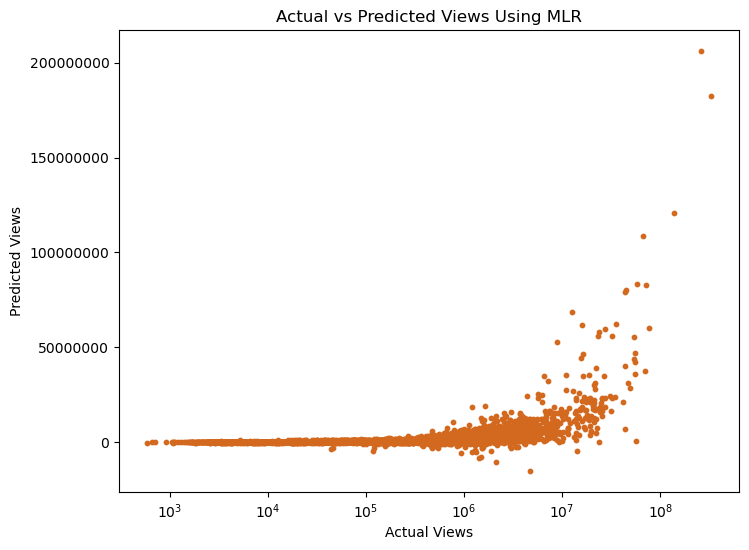

In [376]:
rcParams['figure.figsize'] = 8,6
plt.scatter(y_test,predicted, s=10, color='chocolate');
plt.ticklabel_format(useOffset=False, style='plain')
plt.xscale('symlog',linthreshx=5.)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views Using MLR')
plt.show()


MLR feature selection using p-value 

In [377]:
#assign a constant to x_train to use to generate p-values for the features  
x_train_sm = sm.add_constant(x_train)

In [378]:
mlr_model = sm.OLS(y_train,x_train_sm).fit()

In [379]:
mlr_model

In [380]:
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     5056.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:39:29   Log-Likelihood:            -5.0110e+05
No. Observations:               30236   AIC:                         1.002e+06
Df Residuals:                   30222   BIC:                         1.002e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.278e+04   6.39e+04      0.669      0.5

Features 9, 10, 12, and 13, which are saturday, sunday, tuesday, and wednesday, have p-values large than 0.5, which show that they do not add great value to the accuracy of the regression. 

In [381]:
#calculate the mean square error 
mse = metrics.mean_squared_error(y_test,predicted)

In [382]:
#calculate the root mean square percentage error 
#code inspired from https://stackoverflow.com/questions/55325114/how-to-express-root-mean-squared-error-as-a-percentage
rmspe = np.sqrt(np.mean(np.square(((y_test - predicted) / y_test)), axis=0))

In [383]:
rmspe

15.923704590162279